In [1]:
!pip install sorted-months-weekdays --quiet
!pip install sort-dataframeby-monthorweek --quiet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sorted_months_weekdays import *
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [3]:
# load the dataset from github
dff = pd.read_csv("https://raw.githubusercontent.com/harsh21476/Machine-Learning-on-Bank-Marketing-Dataset/master/bank-full.csv", sep = ";")
dff.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
dff.shape

(45211, 17)

In [5]:
dff.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
"Short Statistics of dataset"
dff.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


###Data Cleaning

In [8]:
"Check for null/missing values"
dff.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
"Check for total number of duplicates"

dff.duplicated().sum()

0

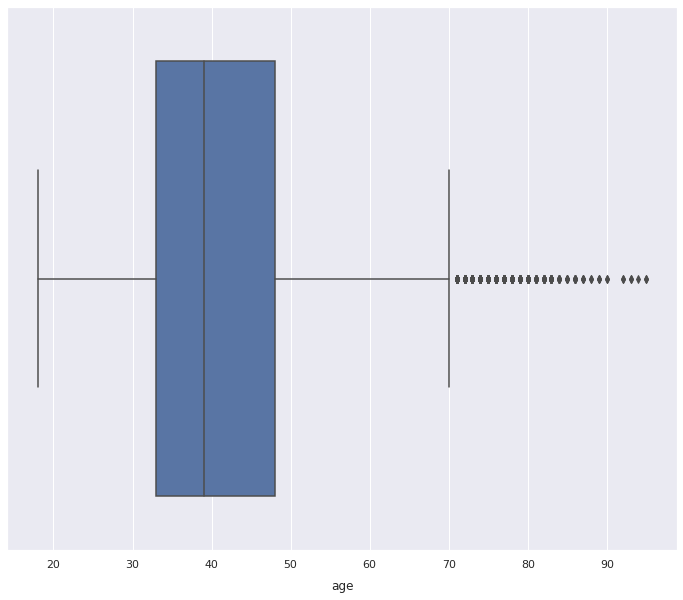

In [10]:
"Check for outliers"

sns.boxplot(x=dff['age'])
plt.show()

In [11]:
df = dff[dff['age'] < 70]
df.shape

(44657, 17)

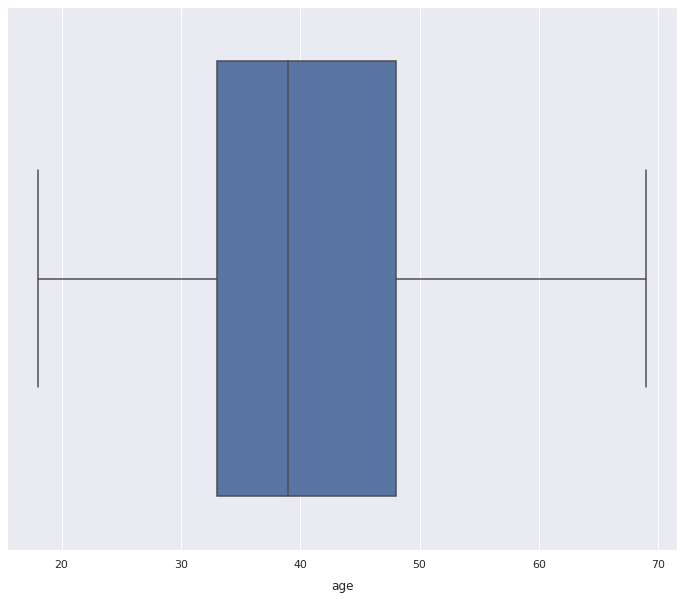

In [12]:
"Check for duplicates again"

sns.boxplot(x=df['age'])
plt.show()

###Exploratory Data Analysis

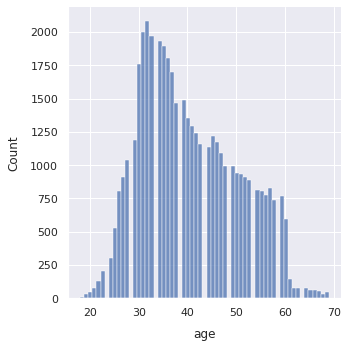

In [13]:
"Lets See the age distribution of the dataframe"
age_dis = df['age']

sns.displot(age_dis)
plt.show()

In [14]:
"Count of Job types"

df['job'].value_counts()

blue-collar      9728
management       9439
technician       7591
admin.           5168
services         4154
retired          1776
self-employed    1573
entrepreneur     1484
unemployed       1303
housemaid        1223
student           938
unknown           280
Name: job, dtype: int64

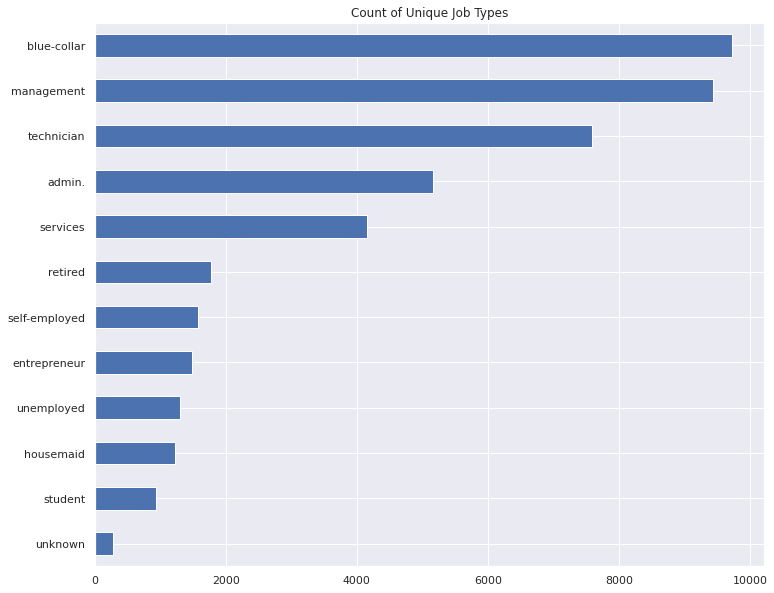

In [15]:
df['job'].value_counts().sort_values().plot(kind='barh', title='Count of Unique Job Types')
plt.show()

In [16]:
"Lets see the count of unique Education levels"

df['education'].value_counts()

secondary    23042
tertiary     13204
primary       6609
unknown       1802
Name: education, dtype: int64

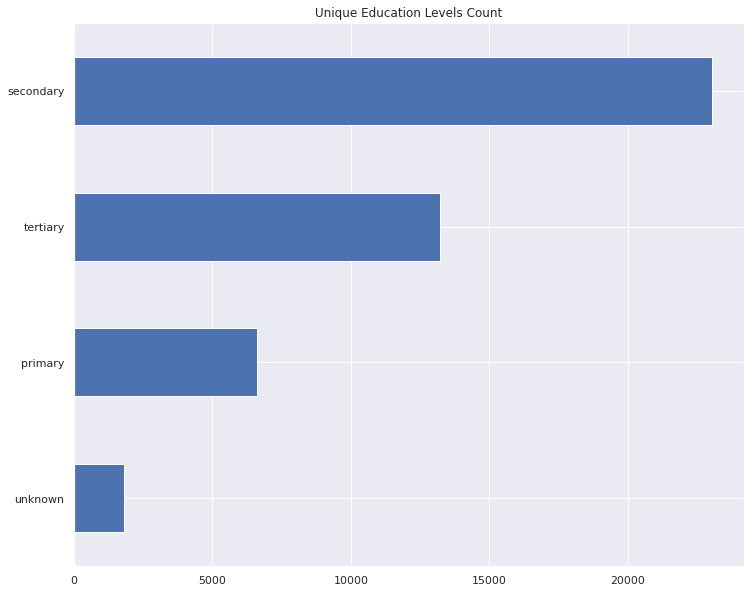

In [17]:
df['education'].value_counts().sort_values().plot(kind='barh', title='Unique Education Levels Count')
plt.show()

The above plot indicates that the highest education level for most people in my dataframe is secondary.

In [18]:
"Lets see the marital status"

df['marital'].value_counts()

married     26795
single      12777
divorced     5085
Name: marital, dtype: int64

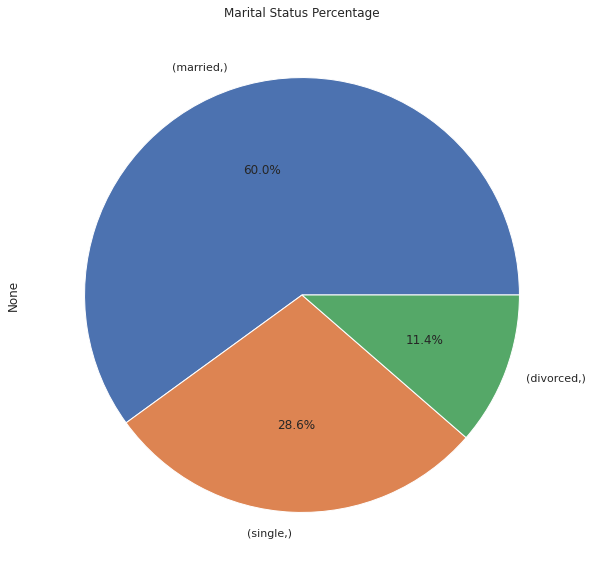

In [19]:
df[['marital']].value_counts().plot.pie(y='marital', title='Marital Status Percentage', autopct='%1.1f%%')
plt.show()

In [20]:
"Unique features of Contact and a value count"

df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

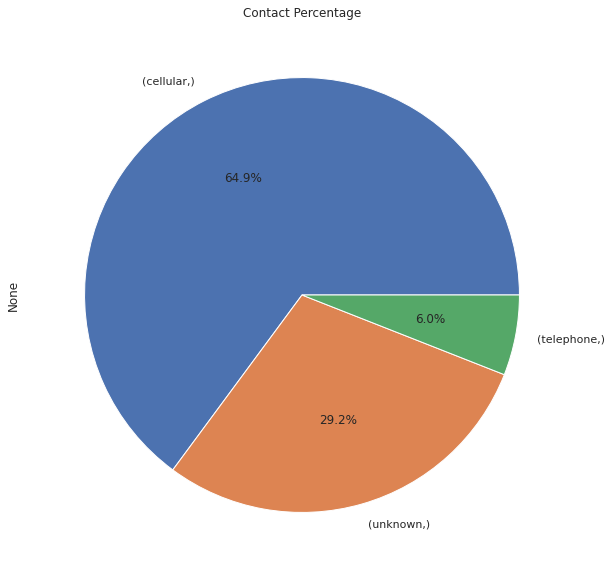

In [21]:
df[['contact']].value_counts().plot.pie(y='contact', title='Contact Percentage', autopct='%1.1f%%')
plt.show()

In [22]:
"Let's See The Last Contact Day of The week"

df['Day'] = pd.to_datetime(df['day']).dt.day_name()
df['Day'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Thursday    44657
Name: Day, dtype: int64

Turns out we have only Thursday, possibly contact days were only on Thursdays

In [23]:
"Month of Last Contact"


df['month'].value_counts()

may    13742
jul     6859
aug     6167
jun     5322
nov     3933
apr     2862
feb     2584
jan     1381
oct      662
sep      514
mar      438
dec      193
Name: month, dtype: int64

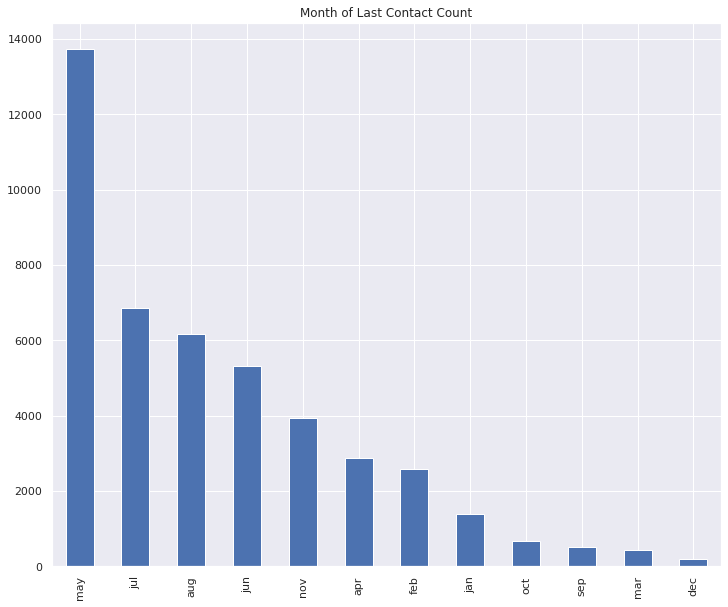

In [24]:
df['month'].value_counts().plot(kind='bar', title='Month of Last Contact Count')
plt.show()

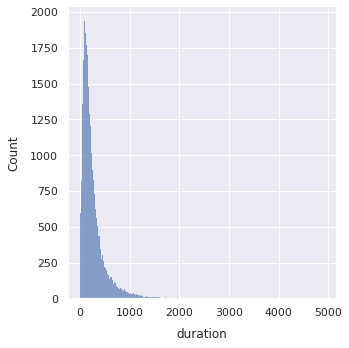

In [25]:
'Lets see the distribution of duration'


sns.displot(df['duration'])
plt.show()

Duration is highly skewed to the left and contains outliers too

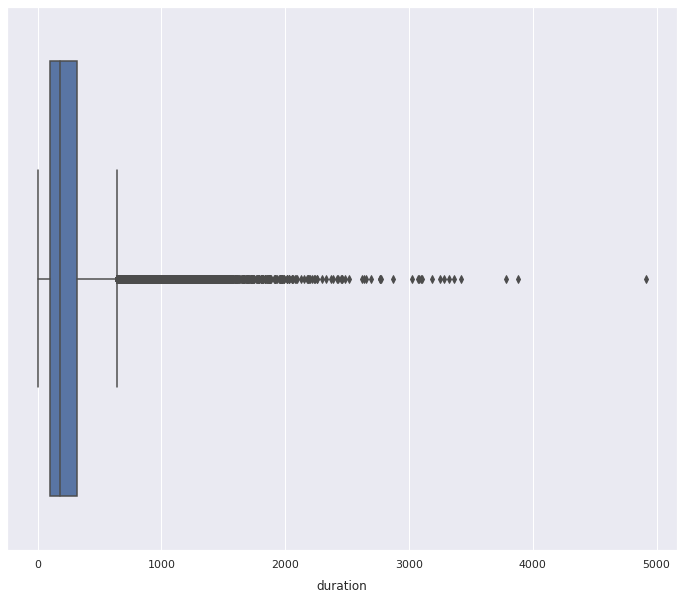

In [26]:
"The duration clearly contains outliers, this can be seen clearly in a boxplot."

sns.boxplot(x=df['duration'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


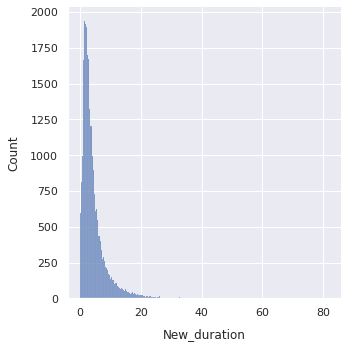

In [27]:
df['New_duration'] = df['duration'] / 60

sns.displot(df['New_duration'])
plt.show()

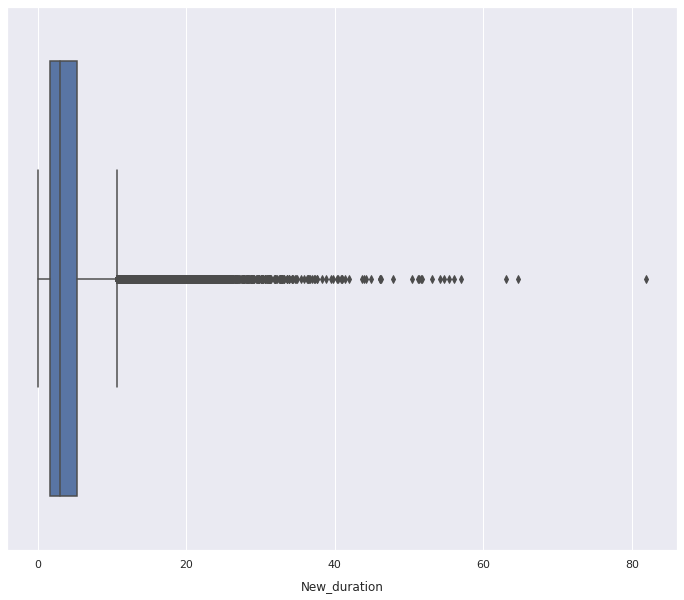

In [28]:
sns.boxplot(x=df['New_duration'])
plt.show()

In [29]:
#df['Duration'] = df[df['New_duration'] < 10]

Due to the importance of duration of last contact with the people, I wont remove the outliers, instead I would convert to minutes from seconds

In [30]:
"Unique features of poutcome"

df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

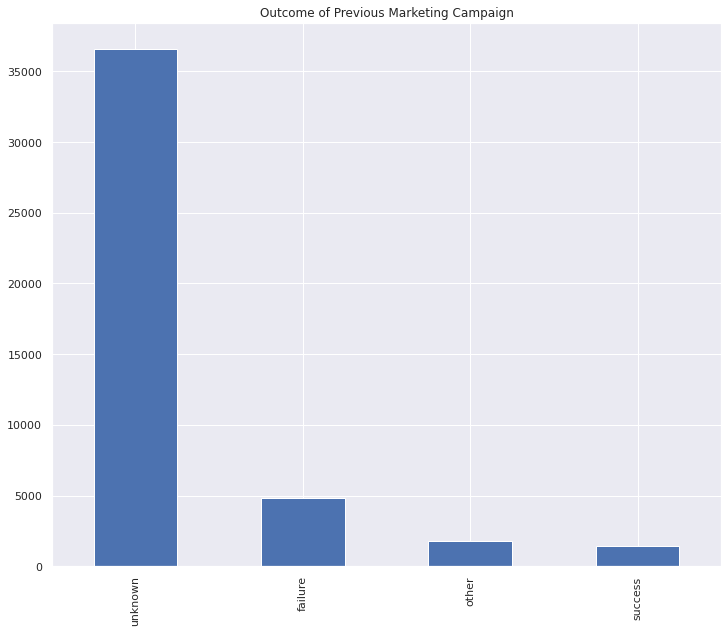

In [31]:
df['poutcome'].value_counts().plot(kind='bar', title='Outcome of Previous Marketing Campaign')
plt.show()

In [32]:
"Value count of the target variable "

df['y'].value_counts()

no     39603
yes     5054
Name: y, dtype: int64

In [33]:
"Lets See a plot of defaulters by marital status"

default_peps = df[['marital', 'default']].groupby(['marital', 'default'])['default'] \
                                          .count() \
                                          .reset_index(name='count') \
                                          .sort_values(['count'], ascending=False).head()

default_peps.head()

,marital,default,count
2,married,no,26347
4,single,no,12538
0,divorced,no,4958
3,married,yes,448
5,single,yes,239


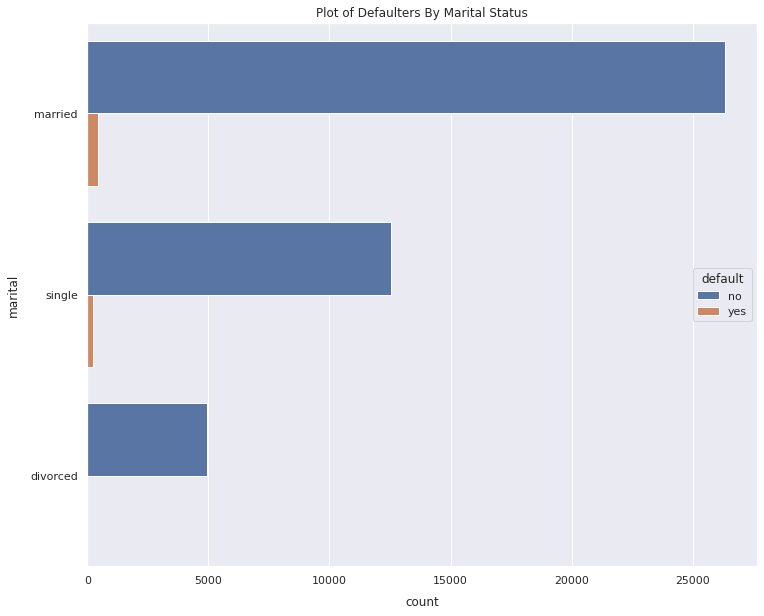

In [34]:
sns.barplot(x='count', y='marital', data=default_peps, hue='default')
plt.title("Plot of Defaulters By Marital Status")
plt.show()

The plot shows that we have more married people as defaulters

In [35]:
"Let's Check the distribution of people based on their marital status and housing"

ma_housing = df[['marital', 'housing']].groupby(['marital', 'housing'])['housing'] \
                                      .count() \
                                      .reset_index(name='count') \
                                      .sort_values(['count'], ascending=False)

ma_housing.head(2)                                      

,marital,housing,count
3,married,yes,15315
2,married,no,11480


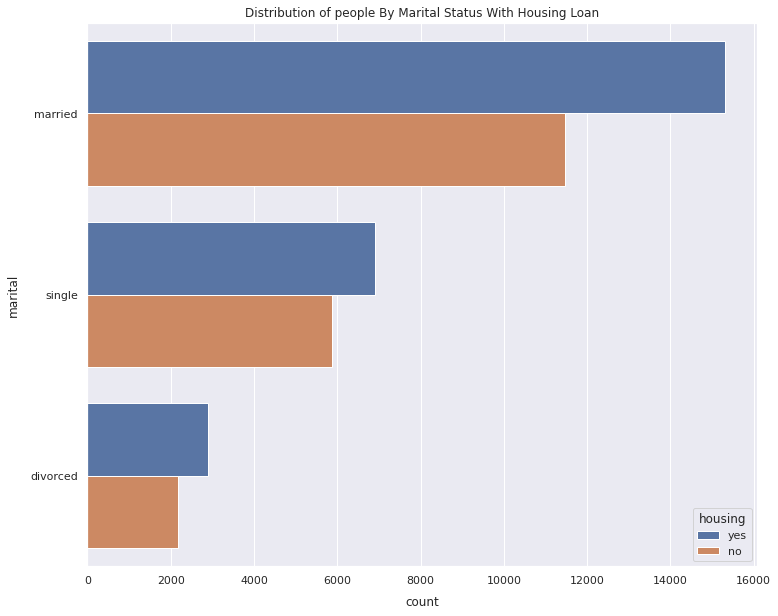

In [36]:
sns.barplot(x='count', y='marital', data=ma_housing, hue='housing')
plt.title("Distribution of people By Marital Status With Housing Loan")
plt.show()

In [37]:
ma_loans = df[['marital', 'loan']].groupby(['marital', 'loan'])['loan'] \
                                   .count() \
                                   .reset_index(name='count') \
                                   .sort_values(['count'], ascending=False)

ma_loans.head(2)                                   

,marital,loan,count
2,married,no,22137
4,single,no,11115


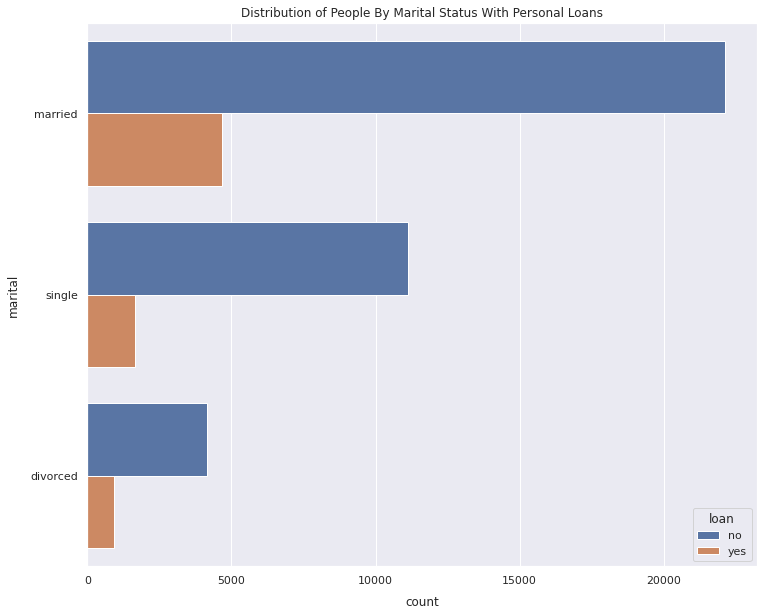

In [38]:
sns.barplot(x='count', y='marital', data= ma_loans, hue='loan')
plt.title("Distribution of People By Marital Status With Personal Loans")
plt.show()

In [39]:
"Lets do a check the level of educatioo and loan status"

loan_status = df[['education', 'loan']].groupby(['education', 'loan'])['loan'] \
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['count'], ascending=False)

loan_status.head(2)                                    

,education,loan,count
2,secondary,no,18741
4,tertiary,no,11420


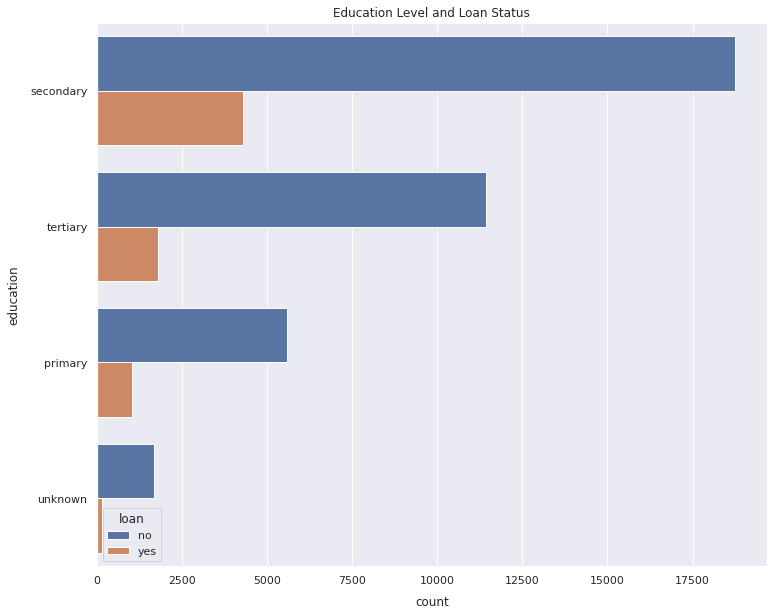

In [40]:
sns.barplot(x='count', y='education', data=loan_status, hue='loan')
plt.title('Education Level and Loan Status')
plt.show()

In [41]:
"Lets the different levels of Education and their common job type"

job_edu = df[['education', 'job']].groupby(['education', 'job'])['job'] \
                                  .count() \
                                  .reset_index(name='count') \
                                  .sort_values(['count'], ascending=False)

job_edu.head(2)                                  

,education,job,count
28,tertiary,management,7791
13,secondary,blue-collar,5369


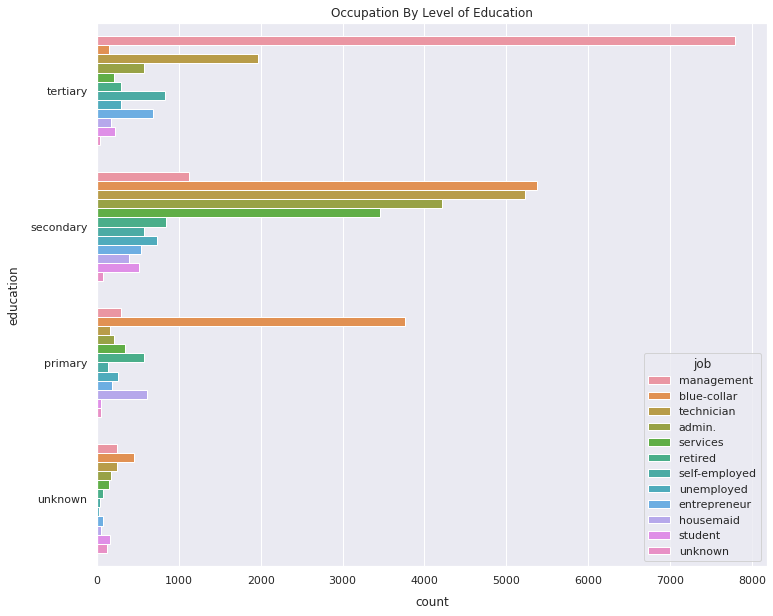

In [42]:
sns.barplot(x='count', y='education', data=job_edu, hue='job')
plt.title("Occupation By Level of Education")
plt.show()

>The plot above says alot about the kind of jobs people do by their level of education. People with tertiary education took on mostly management job with a few of them technicians, while most people with secondary education took on blue-collar jobs, technician, admin and people with primary education took on mostly blue collar jobs. 

Relationship Between Target and Some Input Features

In [43]:
feat_y = df[['marital', 'job', 'housing', 'poutcome', 'y']]

In [44]:
"First Lets see take the count of subscribers"

feat_y['y'].value_counts()

no     39603
yes     5054
Name: y, dtype: int64

In [45]:
"Marital Status and Term Deposit Subscription"

d = feat_y.groupby(['y', 'marital'])['marital'].count() \
          .reset_index(name='count') \
          .sort_values(['count'], ascending=False)


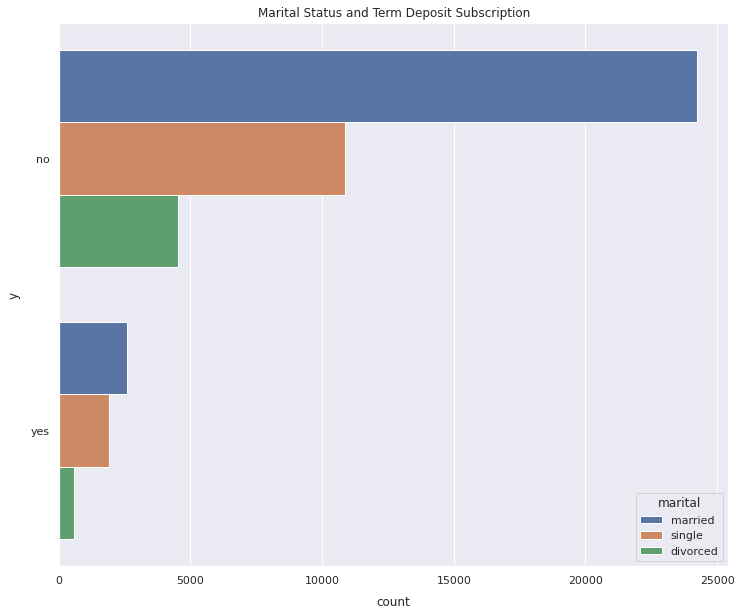

In [46]:
sns.barplot(x='count', y='y', data=d, hue='marital')
plt.title("Marital Status and Term Deposit Subscription")
plt.show()

In [47]:
"Occupation and Term Deposit Subscription"

dj = feat_y.groupby(['y', 'job'])['job'].count() \
          .reset_index(name='count') \
          .sort_values(['count'], ascending=False)

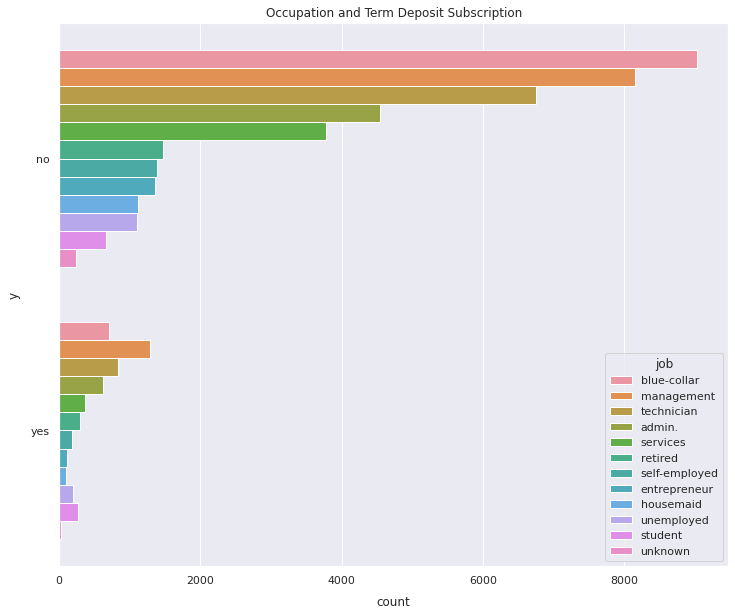

In [48]:
sns.barplot(x='count', y='y', data=dj, hue='job')
plt.title("Occupation and Term Deposit Subscription")
plt.show()